<a href="https://colab.research.google.com/github/ektamistry/ekta/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting the satisfaction of airline experience using Naive Bayes classifier.

In [ ]:
#importing general libraries to be used 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train.csv')  #reading data

In [ ]:
df.shape #displaying size

(103904, 25)

In [ ]:
df.head() #displaying head of data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


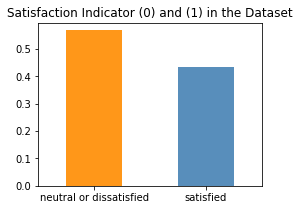

In [ ]:
#checking ratio of satisfied and unsatisfied
fig = plt.figure(figsize = (4,3))
df.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show() 

Since the ratio isn't too skewed, we can move on and check the correlations between variables and explore the dataset.

### Exploring data 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


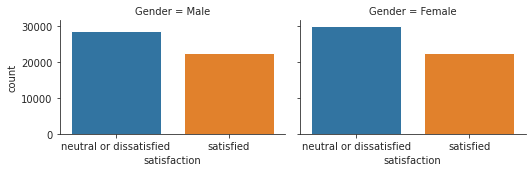

In [ ]:
#plotting gender against satisfaction count
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.5)  

*   The gender distribution of neutral/dissatisfied and satisfied customers are similar.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


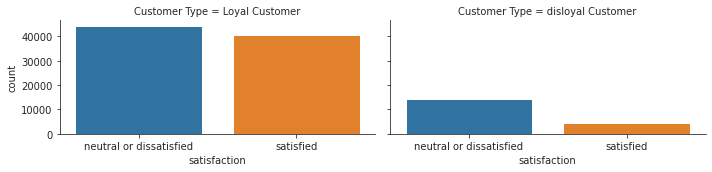

In [ ]:
#plotting customer loyalty against satisfaction
with sns.axes_style(style='ticks'):  
    g = sns.catplot("satisfaction", col="Customer Type", col_wrap=2, data=df, kind="count", height=2.5, aspect=2.0)


*   For customer loyalty, even the loyal ones have a close satisfied unsatisfied ratio. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


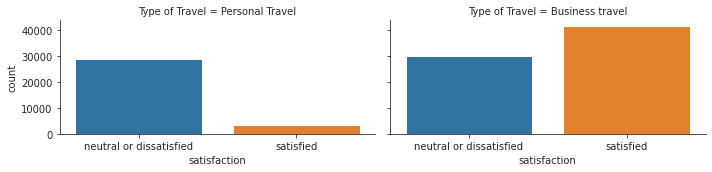

In [ ]:
#plotting type of travel and  satisfaction
with sns.axes_style(style='ticks'):  
    g = sns.catplot("satisfaction", col="Type of Travel", col_wrap=2, data=df, kind="count", height=2.5, aspect=2.0)

*   Passengers travelling for business reasons are much more satisfied in general.

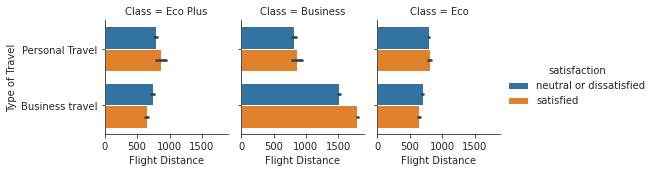

In [ ]:
#plotting how flight distance in different classes for different reasons of travel affect satisfaction
with sns.axes_style('ticks'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=df, kind="bar", height=2.5, aspect=1.0)

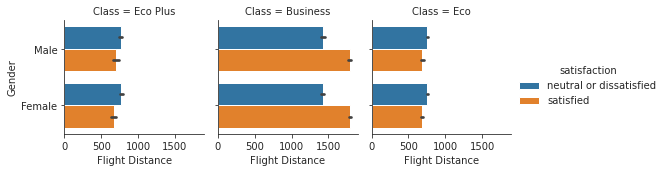

In [ ]:
#plotting how different reasons of travel affect satisfaction for males and females.
with sns.axes_style('ticks'):
    g = sns.catplot(x="Flight Distance", y="Gender", hue="satisfaction", col="Class", data=df, kind="bar", height=2.5, aspect=1.0)


*   For business travel in business class, more satisfied passengers are there for longer flight distance. Others have almost equal distribution of satisfied and neutral/dissatisfied. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


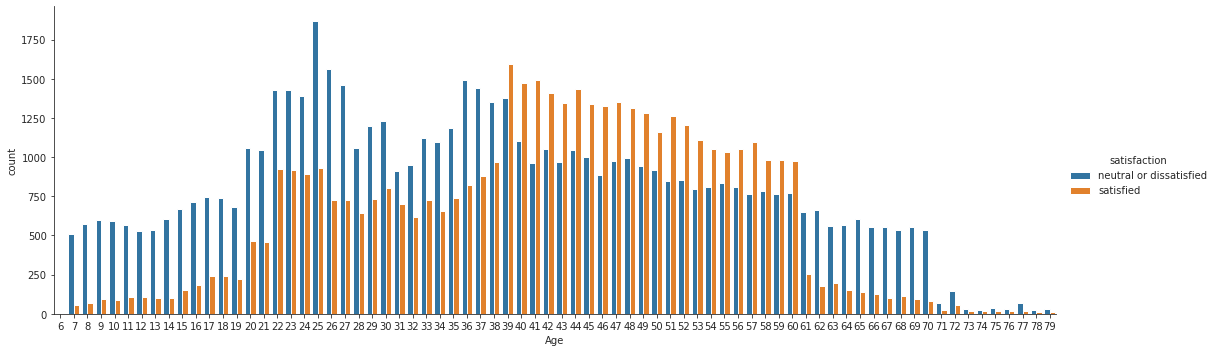

In [ ]:
#plotting how age affects satisfaction
with sns.axes_style('ticks'):
    g = sns.catplot("Age", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(6, 80))

*   Number of neutral/dissatisfied passengers high for age 7-to-38 & 61-to-79, number of satisfied passengers is high in age group 39-60. 
<br><br>

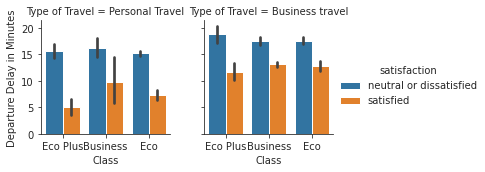

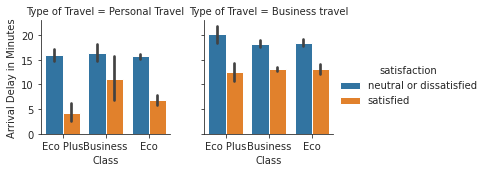

In [ ]:
#plotting how delay in arrival or departure in each class affects satisfaction
with sns.axes_style('ticks'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=df, kind="bar", height=2.5, aspect=1.0)
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=df, kind="bar", height=2.5, aspect=1.0)

*   For personal type of travel (specially for classes Eco Plus and Eco), the number of neutral/dissatisfied passengers are really high when arrival delay is high which is quite obvious.
<br><br>

### Choosing variable cells

In [ ]:
#convert categorical into numerical values 
df['Gender'] = np.where(df['Gender']=='Male',0,1) #male = 0, female = 1
df['Travel Reason'] = np.where(df['Type of Travel']=='Personal Travel',0,1) #personal travel = 0
df['Satisfaction_numeric'] = np.where(df['satisfaction']=='satisfied',0,1) #satisfied = 0, neutral unsatisfied = 1
df['CustomerType_numeric'] = np.where(df['Customer Type']=='Loyal Customer',0,1) 
df['ClassType_Numeric'] = np.where(df['Class']=='Eco',0,np.where(df['Class']=='Eco Plus',1,np.where(df['Class']=='Business',2,3)))

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Travel Reason,Satisfaction_numeric,CustomerType_numeric,ClassType_Numeric
0,0,70172,0,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,4,5,5,25,18.0,neutral or dissatisfied,0,1,0,1
1,1,5047,0,disloyal Customer,25,Business travel,Business,235,3,2,...,1,4,1,1,6.0,neutral or dissatisfied,1,1,1,2
2,2,110028,1,Loyal Customer,26,Business travel,Business,1142,2,2,...,4,4,5,0,0.0,satisfied,1,0,0,2
3,3,24026,1,Loyal Customer,25,Business travel,Business,562,2,5,...,1,4,2,11,9.0,neutral or dissatisfied,1,1,0,2
4,4,119299,0,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,3,0,0.0,satisfied,1,0,0,2


The heatmap displays the relation in numeric between different data columns


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


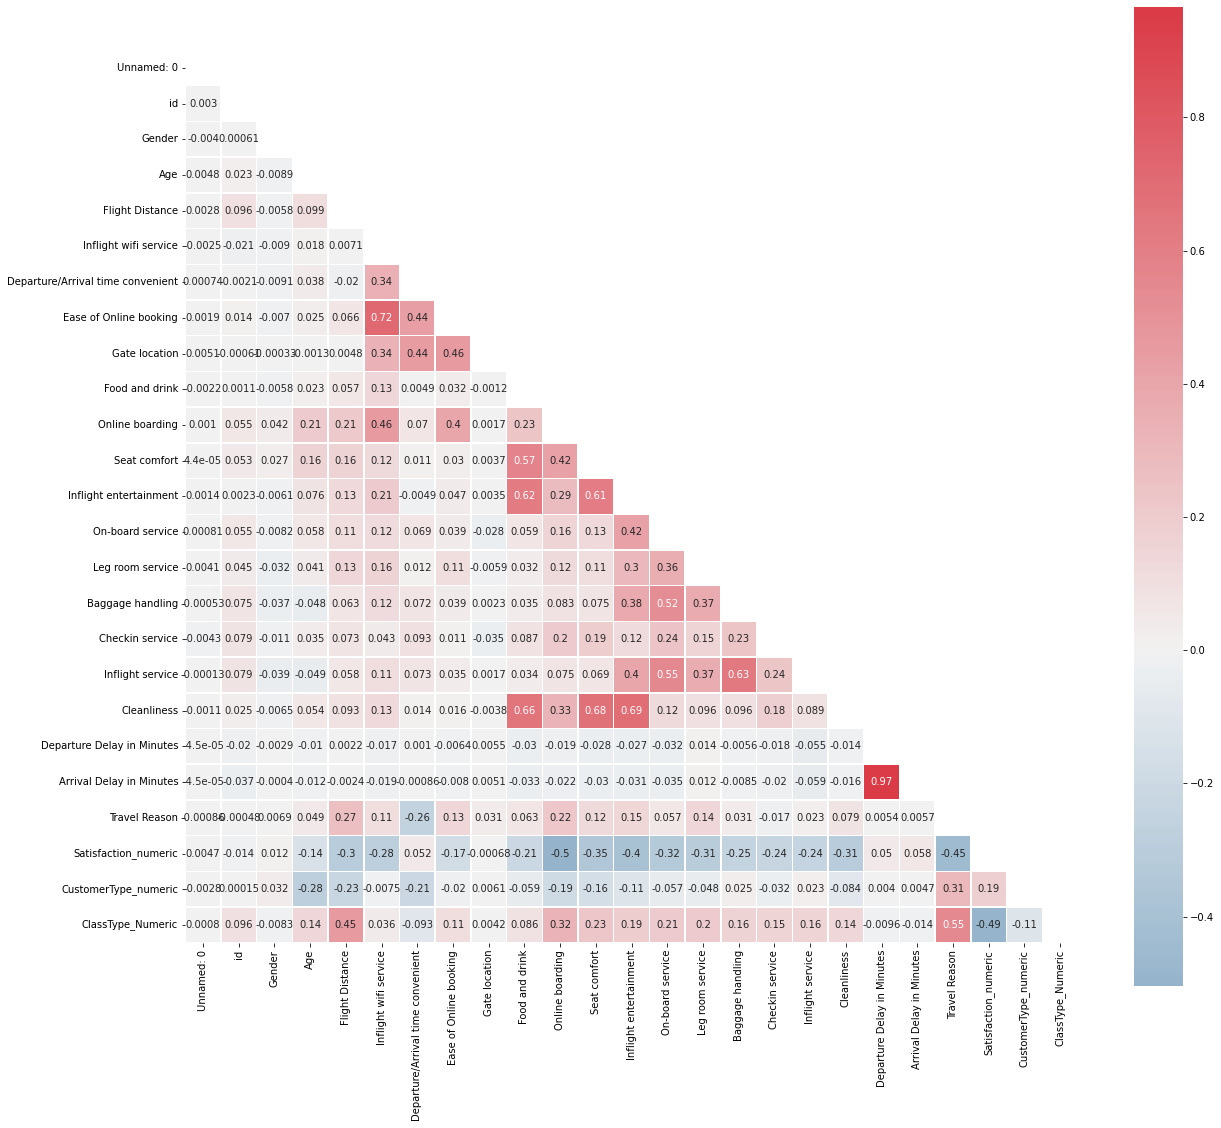

In [ ]:
#displaying a correlation heatmap
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": 0.9})

No pair is having corrrelation coefficient exactly equal to 1. Therefore there is no perfect multi-collinearity. We decide to discard a few variables which we feel aren't important in the current model. We proceed with few variables showing greater correlation which satisfaction_numeric

In [ ]:
#choosing variables needed in model
data = df[['Satisfaction_numeric', 'Gender', 'Travel Reason', 'CustomerType_numeric', 'ClassType_Numeric', 'Inflight service', 'Inflight wifi service']]

In [ ]:
#removing rows containg null cells
data = data.dropna(axis=0, how='any') 

### Training model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#defining the x and y variables from the data table
x = data[['Gender', 'Travel Reason', 'CustomerType_numeric', 'ClassType_Numeric', 'Inflight service', 'Inflight wifi service']] 
y = data['Satisfaction_numeric']

In [ ]:
#dividing the data into training data and testing data in a ratio of 7:3 respectively
#while the default takes a ratio of 75:25, we've specifically taken a 70:30 ratio. 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=0,shuffle=True) 

In [ ]:
xtrain.shape #displaying the r,c of the training data after split

(72732, 6)

In [ ]:
xtest.shape #displaying the r,c of the testing data after split

(31172, 6)

###Building model

In [ ]:
#building naive bayes model
from sklearn.naive_bayes import GaussianNB

In [ ]:
#train model
gnb = GaussianNB()

In [ ]:
#Fit Gaussian Naive Bayes according to x, y.
gnb.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
#Return the mean accuracy on the given data and labels.
gnb.score(xtrain, ytrain)

0.8286448880822747

In [ ]:
#model predictions using model
y_pred = gnb.predict(xtest)

###Evaluating Performance

######Confusion Matrix: Gives a tabular summary of correct and incorrect data.

In [ ]:
#showing confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,y_pred)

array([[11719,  1826],
       [ 3469, 14158]])

In [ ]:
#to plot confusion mat
con_mat = pd.crosstab(ytest,y_pred,rownames=['Actual'],colnames=['Predicted'])

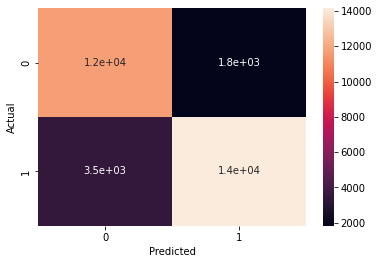

In [ ]:
sns.heatmap(con_mat,annot=True)

The confusion matrix shows TP FN FP TN

As we can see from the heatmap, False positive and False negative errors are low in comparision to the high True Positives and True Negatives.

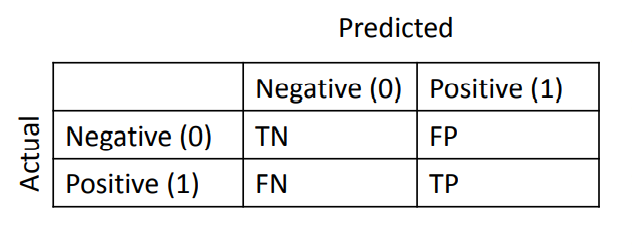

###### Classification measures

In [ ]:
#Accuracy represents the number of correctly classified data instances over the total number of data instances.
# accuracy = (TP + TN)/Total
from sklearn import metrics
accuracy = metrics.accuracy_score(ytest,y_pred)
accuracy

0.8301360195046837

In [ ]:
#precision is the ratio of True Positive and the sum of True Positive and False Positive.
#The model which produces zero False Positive then the precision is 1.0
# Precision = TP/(TP+FP)
from sklearn.metrics import precision_score,recall_score
precision_score(ytest,y_pred)

0.8857607607607607

In [ ]:
#Recall the ratio of True Positive and the sum of True Positive and False Negative.
#The model which produces zero False Negative then the Recall is 1.0
# Recall = TP/(TP+FN)
recall_score(ytest,y_pred)

0.8031996369206331

In [ ]:
#F1 score gives the combined result of Precision and Recall. It is a Harmonic Mean of Precision and Recall.
#F1 = 2 * (precision * recall) / (precision + recall) for multi-class model
from sklearn.metrics import f1_score
f1_score(ytest,y_pred)

0.8424622891315343

In [ ]:
#F1 Score is Good when you have low False Negative and Low False Positive values in the model. 
#When the F1 Score is “1” then the model is perfectly fit but when the F1 Score is “0” then it is a complete failure of the model.

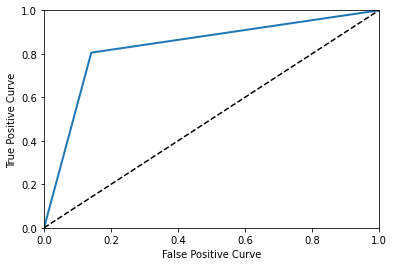

In [ ]:
from sklearn.model_selection import cross_val_predict
y_scores=cross_val_predict(gnb,xtrain,ytrain,cv=3,method='predict')

#plotting the FPR (false positive rate) vs the TPR (true positive rate) 
from sklearn.metrics import roc_curve
fpr,tpr,thresh=roc_curve(ytrain,y_scores)

def plot_roc(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],"k--")
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Curve')
  plt.ylabel('True Positive Curve')
                          
plot_roc(fpr,tpr)        

In [ ]:
! jupyter nbconvert --to html ML_Proj_Test_finppt.ipynb

[NbConvertApp] Converting notebook ML_Proj_Test_finppt.ipynb to html
[NbConvertApp] Writing 815414 bytes to ML_Proj_Test_finppt.html
